In [35]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
rank_output = pd.DataFrame()

In [27]:
submissions = ["lgb_optimal_0.9013692237006661.csv",
              "lgb_baseline_0.9005332611628906.csv",
               "naivebayes_baseline_0.888472439455181.csv"
              ]

In [28]:
n_val = len(pd.read_csv("../input/train.csv", usecols=["target"]))
val_data = np.zeros((n_val, len(submissions)))
column_names = []

for i, submission in enumerate(submissions):
    column_names.append(submission.split('.csv')[0])
    val_data[:,i] = pd.read_csv(r"../output/oof predictions/{}".format(submission), 
                            usecols=["target"]).rank().values[:,0]

oof_labels = pd.read_csv("../input/train.csv", usecols=["target"]).rank().values[:,0]
clf = Ridge(random_state=42)
clf.fit(val_data, oof_labels)
clf.coef_

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=42, solver='auto', tol=0.001)

array([0.11595464, 0.05684693, 0.04835089])

In [4]:
n_test = len(pd.read_csv("../input/test.csv", usecols=["ID_code"]))
test_data = np.zeros((n_test, len(submissions)))

In [5]:
column_names = []

In [6]:
for i, submission in enumerate(submissions):
    column_names.append(submission.split('.csv')[0])
    test_data[:,i] = pd.read_csv("../submissions/{}".format(submission), 
                               usecols=["target"]).values[:,0]

In [7]:
test_df = pd.DataFrame(data=test_data, columns=column_names)

In [14]:
test_df.head(10)

,lgb_optimal_0.9013692237006661,lgb_baseline_0.9005332611628906,gp_blend_unknown
0,0.477733,0.090361,0.059226
1,0.690618,0.225661,0.113019
2,0.639722,0.178853,0.083029
3,0.647539,0.209107,0.064921
4,0.252872,0.046328,0.020245
5,0.013025,0.002240,0.001240
6,0.040885,0.006710,0.004582
7,0.634742,0.186779,0.087296
8,0.014345,0.002670,0.001528
9,0.054430,0.007736,0.004994


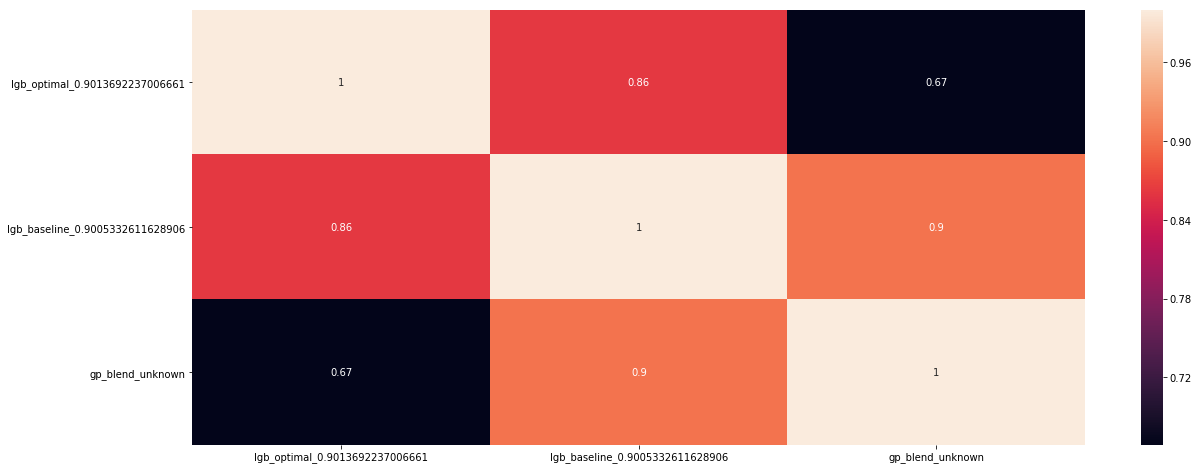

In [9]:
corr = test_df.corr()
fig, ax = plt.subplots(figsize=(20,8)) 

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot=True,
           ax=ax)

In [10]:
test_ranks = test_df.rank()
test_ranks["mean_rank"] = test_ranks.mean(axis=1)
test_ranks.head()

,lgb_optimal_0.9013692237006661,lgb_baseline_0.9005332611628906,gp_blend_unknown,mean_rank
0,150928.0,146227.0,156623.0,151259.333333
1,177262.0,178704.0,179116.0,178360.666667
2,171934.0,172080.0,169629.0,171214.333333
3,172823.0,176649.0,160487.0,169986.333333
4,106738.0,112891.0,100744.0,106791.000000


In [11]:
ss = MinMaxScaler()

In [12]:
rank_preds = test_ranks["mean_rank"].values
rank_preds = rank_preds.reshape(-1, 1)

In [13]:
submission = pd.read_csv('../input/sample_submission.csv')
submission['target'] = ss.fit_transform(rank_preds)
submission.to_csv('../submissions/rank_preds.csv', index=False)

In [25]:
from sklearn.linear_model import Ridge

In [24]:
train_labels

array([89951.5, 89951.5, 89951.5, ..., 89951.5, 89951.5, 89951.5])